# Programming for Data Analysis Assignment

### Guidance notes to be deleted

What are the likely data points that you collect from a phenomenon? How are the variables related to each other? What does the distribution look like? Is it a normal distribution? A Poisson distribution?

Brian: "So I'm not actually that interested in the actual data. What we're most interested in is the research investigations you do to create the dataset, because presumably there will be some random element in the generation of your data, following some sort of distribution. And I'll be able to re-run your notebook and get a different randomly-generated dataset with the same properties."

- types of variables and their distributions, relationships to each other
- simulate a second dataset based on the original dataset
- most of the work will come in the investigation, as you've seen working with numPy and other packages, it only take a few commands to generate significant amounts of data
- you'll need to look at each variable and wonder what type of distribution it falls into

In [1]:
# did you use all of these libraries?
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

ash = pd.read_csv('eng_aus_data.csv')

## Rationale

The dataset I have used for this assignment, taken from CricInfo's [Statsguru](https://stats.espncricinfo.com/ci/engine/stats/index.html) query engine, details the match outcome of 153 five-day Test cricket matches played between England and Australia in England, Wales and Australia since the 1st January, 1970. The decision to choose this area to research was taken after reading the chapter "The Cat That Turned into a Fence" in Nathan Leamon and Ben Jones' _Hitting Against the Spin: How Cricket Really Works_ (2021, 172-197), which briefly touches on this area as a whole, before conducting some deeper-dives into more specific match scenarios, which are currently beyond my abilities in terms of turning them into a Python project.

## Data collection

![image](Statsguru.png)

To gather this data, I ran three queries through the Statsguru engine, and the links to the results of each is documented in the README document. The first of these was simply a list of all innings in matches between England and Australia, at any venue, after the 1st January, 1970. I then modified the search criteria to only search for matches where England won the toss, and used a VLOOKUP function in Excel to add this as columnar data in a CSV file containing the results of the first query. I then did the same with matches where Australia won the toss, just to double-check my query.


In [2]:
ash[:10]

,start,host,toss,choice,bat_first,inn1,inn2,winner,outcome
0,22/07/1993,England or Wales,Australia,Bat,Australia,653,200,Australia,won
1,23/08/2001,England or Wales,Australia,Bat,Australia,641,432,Australia,won
2,17/06/1993,England or Wales,Australia,Bat,Australia,632,205,Australia,won
3,10/08/1989,England or Wales,Australia,Bat,Australia,602,255,Australia,won
4,23/11/2006,Australia,Australia,Bat,Australia,602,157,Australia,won
5,08/06/1989,England or Wales,England,Field,Australia,601,430,Australia,won
6,28/11/1986,Australia,England,Bat,England,592,401,draw,draw
7,05/12/2013,Australia,Australia,Bat,Australia,570,172,Australia,won
8,16/07/2015,England or Wales,Australia,Bat,Australia,566,312,Australia,won
9,26/12/2002,Australia,Australia,Bat,Australia,551,270,Australia,won


The variables I've chosen to include here are those that are often regarded as key points in the early stage of the match. In cricket, winning a coin toss offers a team's captain the choice of batting or fielding first, and captains will make this decision based on a number of factors, such as their team's strengths (or their opponent's weaknesses), the weather forecast, or the condition of the pitch. This choice is seen as an immediate advantage, and much pre-match discussion centres around what each captain's likely decision will be. For this reason, I've included the winner of the coin toss, as well as their choice, as variables.

The dataset includes the following variables:
- <i>start</i>: the first day of the Test match;
- <i>host</i>: the location of the match. Some England games are played in Cardiff, hence 'England or Wales'. In the CricInfo engine this is listed as the particular stadium that hosted the match;
- <i>toss</i>: the winner of the pre-match coin toss;
- <i>choice</i>: the coin toss winner's decision over whether to bat or field first;
- <i>bat_first</i>: the team that batted first, the <i>outcome</i> column is grouped from the perspective of this team;
- <i>inn1</i>: the respective total in the first innings of the match;
- <i>winner</i>: the team that won the match, or 'draw' if neither did;
- <i>outcome</i>: the match result from the perspective of the <i>bat_first</i> team. If <i>bat_first</i> equals 'Australia' and <i>winner</i> equals 'England', then <i>outcome</i> equals 'lost'.

Any [declared](https://www.lords.org/mcc/the-laws-of-cricket/declaration-and-forfeiture) scores have been changed to a simple innings total to preserve the numeric dimension of the data. Ties, an extremely rare occurrence in cricket, did not occur in a single one of the matches between the two countries in this dataset; indeed they have only occurred twice in the history of Test cricket since 1877, and are notable enough to have a separate [Wikipedia](https://en.wikipedia.org/wiki/Tied_Test) entry. While ties are an omission from the simulated dataset at the end of this notebook, they are a statistically insignificant omission.

## Distribution of Variables

### The Host

The rivalry between England is generally played as part of a bilateral series known as The Ashes, whereby the two teams meet approximately every two years, alternating as hosts. Each series was historically between four and six matches long, but since the mid-1990s has settled on a consistent five-match format. Of the 153 matches that form this dataset, all but six of these matches (all taking place between 1977 and 1988) were contested as part of The Ashes; overall, Australia has hosted 78 games to the 75 in England or Wales. Due to the regularity of the series, as well as the alternation between host countries, this particular variable is best described as binomially-distributed.

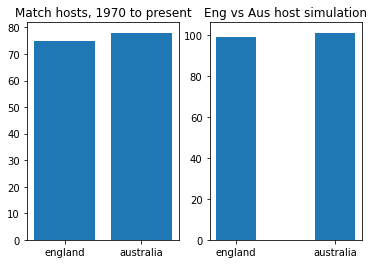

In [3]:
# code for historical data based on the tutorial at Python Guides found in the README

# number of times each country has hosted a match
host = ['england', 'australia']
occs = [75, 78]

plt.subplot(1, 2, 1)
plt.bar(host, occs)
plt.title("Match hosts, 1970 to present")

# binomially-distributed generated data for simulated England vs Australia matches
tests = 200
# represents the expected split between hosts in future series
host_choice = 0.5
sim_host = np.random.binomial(1, host_choice, size=tests)

# the val, counts idea is something I got from Ian McLoughlin's notebooks for Fundamentals of Data 
# Analysis module, which is references in the README document
vals, counts = np.unique(sim_host, return_counts=True)
plt.subplot(1, 2, 2)
plt.bar(vals, counts, width=0.4)
plt.title('Eng vs Aus host simulation')
plt.xticks(vals, host)
plt.show()

### The Toss and the Captain's Decision

I have chosen 1970 as my starting point as this was the period when ground staff at English cricket grounds were no longer permitted to leave pitches [uncovered](https://www.lords.org/mcc/the-laws-of-cricket/covering-the-pitch). Before this, pitches were not sheltered from any adverse weather once a match started, significantly affecting the conditions of the match, pitch quality, and captain's decisions at the toss. 

Of course, a coin toss is the classic example used for demonstrating binomial distribution, but while the decision to bat or field is a binary choice, it is far from binomially-distributed in the same sense as a coin toss. Leamon and Jones (2021, 175) state that:

    "The vast majority (89 per cent) of captains who won the toss chose to bat, and this resulted in sides who won the toss having a markedly better chance of winning."
    
The same authors argue that this tendency has proven hard to remove in the era of covered pitches, observing that:

    "In Tests played between 1980 and 2010, nearly twice as many captains have batted first than have chosen to bowl."

The dataset I have extracted reflects this, with 104 teams choosing to bat, and 49 choosing to bowl. Such a disparity between the choices of whether to bat or field would imply some perceived advantage to bowling first, but wider research, and the dataset itself, suggests otherwise.

Toss Choices in Test Matches


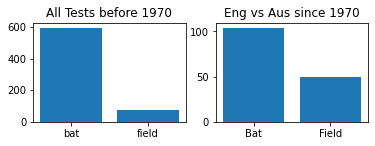

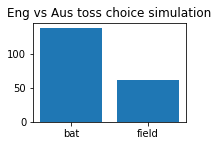

In [11]:
# representing the 669 tests that occurred before 1970](https://stats.espncricinfo.com/ci/engine/records/team/match_results.html?class=1;id=1969;type=year)
# Leamon and Jones: 89 percent of captains chose to bat
occs = [595, 74]
# number of times each decision has occurred
decs = ['bat', 'field']

print("Toss Choices in Test Matches")
plt.subplot(2, 2, 1)
plt.bar(decs, occs)
plt.title("All Tests before 1970")

# plotting real results of dataset for England vs Australia matches since 1970
ashchoice = ash['choice']
vals, counts = np.unique(ashchoice, return_counts=True)
plt.subplot(2, 2, 2)
plt.bar(vals, counts)
plt.title("Eng vs Aus since 1970")
plt.show()

# binomially-distributed generated data for simulated England vs Australia matches
toss = 1
tests = 200
# represents the actual proportions of decisions to either field (49) or bat (104) in the extracted dataset
bat_choice = 1 - ( 104 / ( 49 + 104 ) )
sim_choice = np.random.binomial(toss, bat_choice, tests)

vals, counts = np.unique(sim_choice, return_counts=True)
plt.subplot(2, 2, 3)
plt.bar(vals, counts)
plt.title("Eng vs Aus toss choice simulation")
plt.xticks(vals, decs)
# adding a second show() function to give some space to headers and x-axis labels
plt.show()

While Lawrence Booth ([CricInfo](https://www.espncricinfo.com/story/cricket-s-turning-points-covered-pitches-461172), 2010) argues that the introduction of covered pitches has brought a "normalisation of batting conditions all round the world", the decisions of captains has clearly not yet caught up with the change in match outcomes for batting-first teams that has occurred.

To return to Leamon and Jones, they observed that in Tests occurring between 1980 and 2010: 

    "The bat-first bias at the toss would seem to be neutral at best, and probably counter-productive."
    
Their data covering all tests from 1970 puts the win rate of teams that batted first (whether it was their decision or that of their opponents) at 36%, with 28% losing and 35% as draws. In their dataset covering 1980 to 2010, this falls to a 31% win rate, with losses rising to 36%, and draws dropping slightly to 33%.

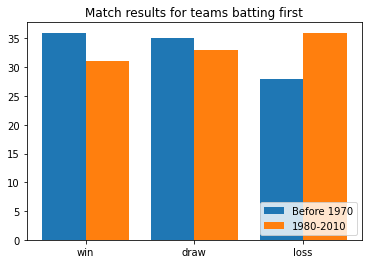

In [5]:
# code based on the tutorial at Python Guides found in the README
# data based on that presented visually in Leamon and Jones (2021, 174-6), in charts 
# labelled "Team Batting First - Before 1970" and "Team Batting First - 1980-2010"

result = ['win', 'draw', 'loss']
before = [36, 35, 28]
after = [31, 33, 36]

x_axis = np.arange(len(result))

# adding or subtracting a value from the x-axis prevents items from overlapping, the exact value being dependent on
# the value given to the width parameter.

plt.bar(x_axis - 0.2, before, width=0.4, label = 'Before 1970')
plt.bar(x_axis + 0.2, after, width=0.4, label = '1980-2010')

# Xticks replaces the values generated by the arange function above with the actual value of the result

plt.xticks(x_axis, result)

plt.legend(loc='lower right')
plt.title("Match results for teams batting first")
plt.show()

Indeed, of the data I have extracted for England-Australia matches, the team batting first won 42%, the team fielding first 32%, and the other 25% were drawn, figures that are close to the wider dataset that Leamon and Jones used, but with a slightly higher win rate.

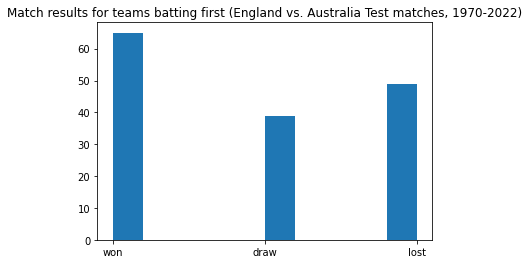

In [6]:
plt.hist(ash['outcome'])
plt.title("Match results for teams batting first (England vs. Australia Test matches, 1970-2022)")
plt.show()

While there was previously a slight advantage to batting first, this is no longer the case.

NEED TO DETERMINE DISTRIBUTION FOR THIS DATA MULTINOMIAL

### First Innings Scores

Of course, once the match starts, the idea is for teams to score as many runs as possible, while leaving enough time to remove ten of their opponent's eleven (there must always be two on the field at the same time) batters. If a team has not completed both of their innings after the allocated five days, then the match is a draw. The most famous draws are those that occur against all odds, and:

    "a reminder that cricket isn’t merely about wins and losses... uncompromising and unpredictable; it was Test match cricket at its purest." (Lavalette, 2018)
    
The logical conclusion is that there is a theoretical ceiling to the number of runs a team is likely to score in any innings, even if they could score as many as they liked. This is one of the many things that sets cricket apart from other sports, it is as if a football team scored three times as many goals as their opponent, but the match was deemed a draw because their opponent had less shots on target.

At the time of writing, a match between England and Pakistan is almost certainly headed for a draw after an extremely bat-friendly pitch in Rawalpindi produced 657 runs in England's first innings, and over 500 in Pakistan's, leading one cricket writer to opine that, "Big runs get you headlines - and a few records - but wickets win you matches." ([Ehantharajah](https://www.espncricinfo.com/story/pakistan-vs-england-1st-test-rawalpindi-england-feel-the-funk-in-bid-to-overcome-unforgiving-pindi-pitch-1347874), 2022).

Returning to the extracted dataset, a 657 would rank higher than any first-innings total achieved in an England vs Australia fixture since 1970, while Pakistan's 579 would rank 8th in second-innings scores. run query again to see how many of those top scores are declarations, highlighting that theoretical ceiling

Place England's 657 in Rawalpindi in context, where does it fall amongst all first innings scores in the extract?, clarify Pakistan's first-innings score

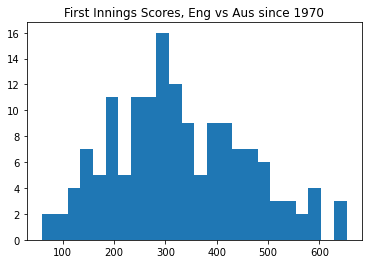

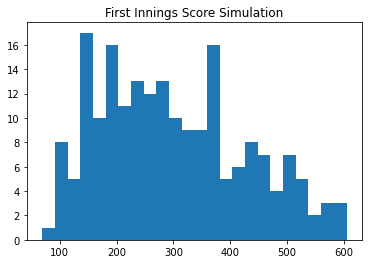

In [7]:
first = ash['inn1']
# establish minimum, modal and maximum values for use in triangular simulation
fmin = first.min()
fmode = first.mode()
fmax = first.max()
# re-interating number of tests we wish to simulate
tests = 200

plt.title("First Innings Scores, Eng vs Aus since 1970")
plt.hist(first, bins=24)
plt.show()

plt.title("First Innings Score Simulation")
sim_first = np.random.triangular(left=fmin, mode=fmode, right=fmax, size=tests)
plt.hist(sim_first, bins=24)
plt.show()

## Second Innings Scores

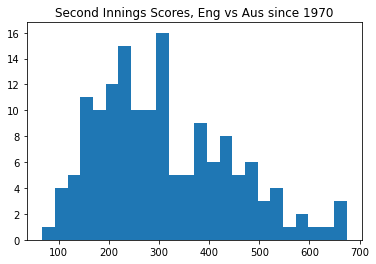

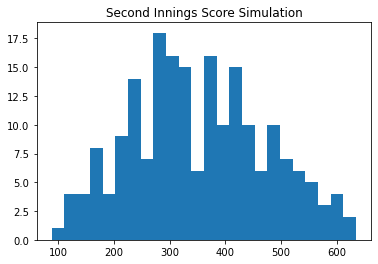

In [8]:
second = ash['inn2']
# establish minimum, modal and maximum values for use in triangular simulation
smin = second.min()
smode = second.mode()
smax = second.max()
# re-interating number of tests we wish to simulate
tests = 200

plt.title("Second Innings Scores, Eng vs Aus since 1970")
plt.hist(second, bins=24)
plt.show()

plt.title("Second Innings Score Simulation")
sim_second = np.random.triangular(left=smin, mode=smode, right=smax, size=tests)
plt.hist(sim_second, bins=24)
plt.show()


DIAGRAM OF WINNER

DIAGRAM OF OUTCOME

Plot each variable against outcome


## Data Synthesis

create a dataframe using the data you've generated previously

## Evaluation

Cricket is an infinitely complex sport full of discrete data points. Unlike other sports, cricket contains pretty much a complete dataset of every event that occurs
- lack of declaration data
- hard to generate clustered dates
- exclusion of third- and fourth-innings scores, too many scenarios to work with, if a team bats second and fails to come within 250 runs of the first-innings total, the opposition captain can enforce a [follow-on](https://www.lords.org/mcc/the-laws-of-cricket/the-follow-on), where the team batting second bats the third innings. While this data is obtainable in the query engine, there were too many permutations given the time I had to complete the assignment
- some games do not have a fourth inning, either because the team following-on fails to get a total with their two innings that surpasses that of their opponent, or the game is significantly curtailed by adverse conditions.
- different grounds are known for being particularly unforgiving to opponents, such as the Gabba in Brisbane (L&J, 174). Again this data is available in the query engine, but I opted for a simpler binary model of host country
- this doesn't seem to take into account the effect of variables on each other. I can identify this but I cannot work out how to split the generation of one variable by another, it is fine saying "I need a triangular distribution of first-innings scores for 200 Test matches, but this is clearly affected by other variables (PLOT ENGLAND RESULTS AND AUSTRALIA RESULTS FOR THIS SEPARATELY)

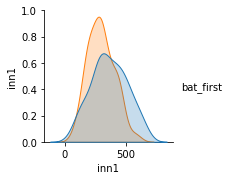

In [12]:
inns2 = ash[['bat_first','inn1']]

# make a better version of this
sns.pairplot(inns2,hue='bat_first')